In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels import regression
from statsmodels.tsa.stattools import adfuller

import pandas as pd
from pandas_datareader import data as pdr
from pandas.util.testing import assert_frame_equal

import yfinance as yf

from patsy import dmatrices
import datetime

In [2]:
start='2019-1-1'
end='2020-1-1'

yf.pdr_override()

df1=pdr.get_data_yahoo("GOOG", start, end)
df2=pdr.get_data_yahoo("SPY", start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
df1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900
...,...,...,...,...,...,...
2019-12-24,1348.500000,1350.260010,1342.780029,1343.560059,1343.560059,347500
2019-12-26,1346.170044,1361.327026,1344.469971,1360.400024,1360.400024,667500
2019-12-27,1362.989990,1364.530029,1349.310059,1351.890015,1351.890015,1038400


In [4]:
df2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,245.979996,251.210007,245.949997,250.179993,245.530655,126925200
2019-01-03,248.229996,248.570007,243.669998,244.210007,239.671631,144140700
2019-01-04,247.589996,253.110001,247.169998,252.389999,247.699615,142628800
2019-01-07,252.690002,255.949997,251.690002,254.380005,249.652634,103139100
2019-01-08,256.820007,257.309998,254.000000,256.769989,251.998199,102512600
...,...,...,...,...,...,...
2019-12-24,321.470001,321.519989,320.899994,321.230011,321.230011,20270000
2019-12-26,321.649994,322.950012,321.640015,322.940002,322.940002,30911200
2019-12-27,323.739990,323.799988,322.279999,322.859985,322.859985,42528800


# GOAL = Obtain Percent Change  [.pct_change()]

* Also, do NOT want to obtain first (0th) element because that will result in NaN


In [5]:
return_goog=df1.Close.pct_change()[1:]
return_spy=df2.Close.pct_change()[1:]

# PLOT Returns Versus
* We will plot the returns of Google and S&P500 against each other


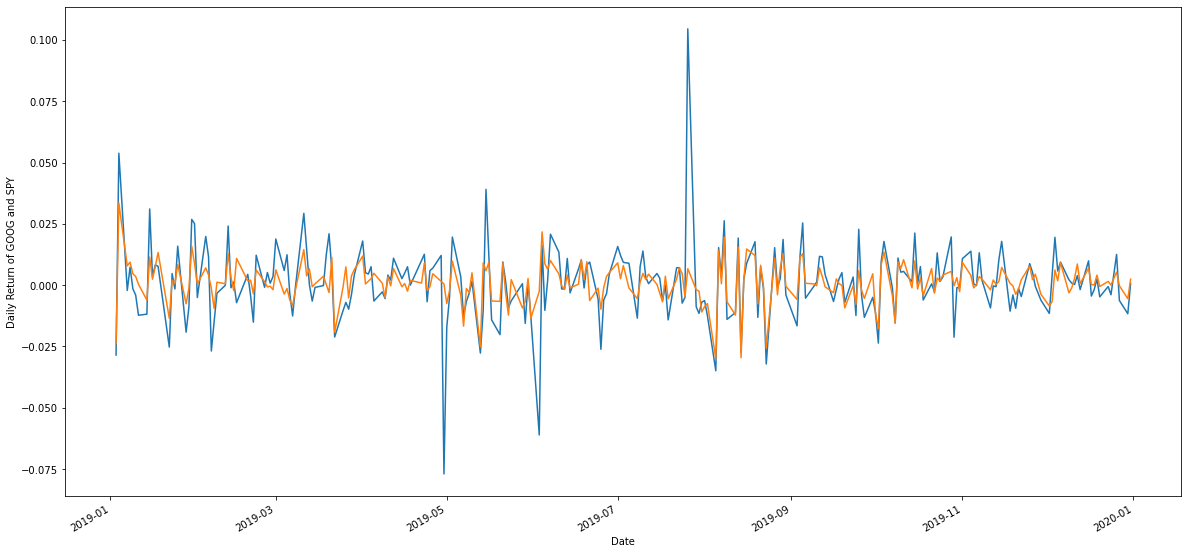

In [6]:
plt.figure(figsize=(20,10))
return_goog.plot()
return_spy.plot()
plt.ylabel("Daily Return of GOOG and SPY")
plt.show()

# Capital Asset Pricing Model or CAPM (How to Calculate Beta)

CAPM model states that the expected return of an asset ‘E (Ra)’ is equal to the risk-free return in the market plus the difference between the expected return of the market and risk-free rate ‘[E (Rm) - Rf]’ multiplied by the asset’s beta  ‘Ba’.

If we have all the values except the asset’s beta, we can calculate the beta using:

* We can even find beta by performing the ‘regression analysis’. 

* When one tries to capture a mathematical relationship between ‘x’ and ‘y’ variables, by fitting a line, polynomial or a curve through scatter plots, such that one can make a reasonably good prediction of  ‘y’ given ‘x’, then the mathematical process of deriving such an equation between x and y is called the regression analysis.This equation can also arrived at by using a machine learning based regression model.

* If we try to fit a ‘line’ through this scatter plot that “best” explains the observed values of ‘y’ in terms of observed values of ‘x’, we get a simple linear regression model.

* Linear regression assumes a linear relationship between the dependent and independent variables. 

* The following regression equation describes that relation:

Yi = b0 + b1 Xi + ei

We refer to the intercept ‘b0’ and slope coefficient ‘b1’ as the regression coefficients and ei  as the random error.

In [8]:
import statsmodels.api as sm
from statsmodels import regression

X=return_spy.values
Y=return_goog.values

def linreg(x,y):
    x=sm.add_constant(x)
    model=regression.linear_model.OLS(y,x).fit()
    
    # REMOVE THE CONSTANT
    x=x[:,1]
    return model.params[0], model.params[1]

alpha, beta = linreg(X,Y)
print('alpha: '+str(alpha))
print('')
print('beta: '+str(beta))

alpha: -0.00022470185309122107

beta: 1.2733247183573915


# LINEAR REGRESSION PLOT

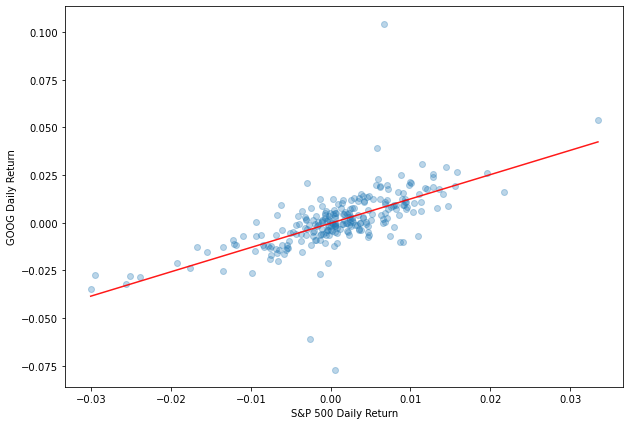

In [9]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alpha

plt.figure(figsize=(10,7))
plt.scatter(X, Y, alpha=0.3) # PLOTS RAW DATA

plt.xlabel('S&P 500 Daily Return')
plt.ylabel('GOOG Daily Return')

plt.plot(X2, Y_hat, 'r', alpha=0.9)

plt.show()